## Purpose of script:
#### Understanding forecast growth and carrying capacity
#### Code referenced from:
#### https://facebook.github.io/prophet/docs/saturating_forecasts.html#forecasting-growth

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
## log number of page visits to the R Wikipedia page
df = pd.read_csv(
    'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')

print(df.shape)
df.head(2)

(2863, 2)


,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733


In [3]:
## specify the carrying capacity in a column cap, i.e. maximum
## cap can be an increasing sequence
df['cap'] = 8.5

In [4]:
m = Prophet(growth='logistic')
m.fit(df)

18:39:56 - cmdstanpy - INFO - Chain [1] start processing
18:39:56 - cmdstanpy - INFO - Chain [1] done processing


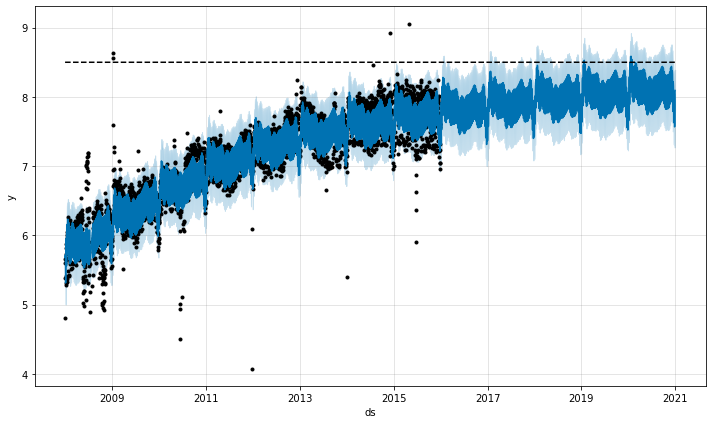

In [5]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

18:41:35 - cmdstanpy - INFO - Chain [1] start processing
18:41:35 - cmdstanpy - INFO - Chain [1] done processing


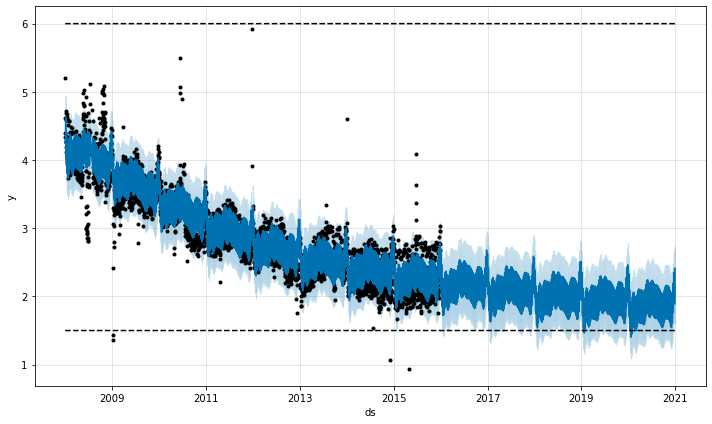

In [6]:
## with a minimum floor of 1.5
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)